# Resnet 50


* importing basic packages *

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

/Users/sourabhsharma/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sourabhsharma/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sourabhsharma/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sourabhsharma/anaconda3/lib/python3.7/site-packages

In [2]:
train = pd.read_csv("/Users/sourabhsharma/Desktop/train.csv")
print(train.shape)

(42000, 785)


In [3]:
y = train['label'].values

# normalize it by dividing by 255
X = train.drop('label', axis = 1).values.reshape((-1, 28, 28, 1)) / 255

# since ResNet is for 3 channel color image but digit is grayscale 1 channle, change it to 3 channel below
X = np.concatenate((X, X, X), axis = 3)

print(X.shape)

(42000, 28, 28, 3)


In [4]:
# We need below to work categorical_crossentropy loss in compiling
y_binary = to_categorical(y)
print(y_binary.shape)
print(y_binary[:6, :])

(42000, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
num_classes = 10

model = Sequential()
model.add(ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))
model.add(Dense(num_classes, activation = 'softmax'))

# specified not to change pre-trained weights
model.layers[0].trainable = False

Instructions for updating:
Colocations handled automatically by placer.
A local file was found, but it seems to be incomplete or outdated because the md5 file hash does not match the original value of a268eb855778b3df3c7506639542a6af so we will re-download the data.
94658560/94653016 [==============================] - 23s 0us/step


In [6]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [7]:
history = model.fit(X,
                    y_binary,
                    batch_size = 100,
                    epochs = 10,
                    verbose = 1,
                    validation_split = 0.2)

Train on 33600 samples, validate on 8400 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
33600/33600 [==============================] - 127s 4ms/sample - loss: 1.0019 - acc: 0.6961 - val_loss: 11.6029 - val_acc: 0.1419
Epoch 2/10
33600/33600 [==============================] - 132s 4ms/sample - loss: 0.6205 - acc: 0.8090 - val_loss: 10.8234 - val_acc: 0.0886
Epoch 3/10
33600/33600 [==============================] - 129s 4ms/sample - loss: 0.5413 - acc: 0.8297 - val_loss: 1.8795 - val_acc: 0.4820
Epoch 4/10
33600/33600 [==============================] - 110s 3ms/sample - loss: 0.5084 - acc: 0.8388 - val_loss: 1.1532 - val_acc: 0.6760
Epoch 5/10
33600/33600 [==============================] - 114s 3ms/sample - loss: 0.4947 - acc: 0.8446 - val_loss: 0.5865 - val_acc: 0.8279
Epoch 6/10
33600/33600 [==============================] - 115s 3ms/sample - loss: 0.4794 - acc: 0.8481 - val_loss: 0.5701 - val_acc: 0.8374
Epoch 7/10
33600/33600 [==============================] - 113

In [8]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'], label = 'Training accuracy')
    plt.plot(hist['epoch'], hist['val_acc'], label = 'Validation accuracy')
    plt.legend()
    plt.show()

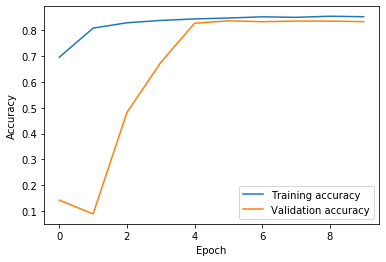

In [9]:
plot_history(history)

In [10]:
test = pd.read_csv("/Users/sourabhsharma/Desktop/test.csv")
print(test.shape)
print(test.head())

(28000, 784)
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0

In [11]:
X_test = test.values.reshape((-1, 28, 28, 1)) / 255
X_test = np.concatenate((X_test, X_test, X_test), axis = 3)
print(X_test.shape)

(28000, 28, 28, 3)


In [12]:
pred_test = model.predict(X_test)
print(pred_test.shape)
print(pred_test[0])
print(np.argmax(pred_test[0]))

(28000, 10)
[2.6251497e-03 5.5847981e-06 8.3171093e-01 1.1660394e-01 3.4367591e-03
 3.2617901e-03 1.5787750e-03 4.0012762e-02 4.8761585e-04 2.7682877e-04]
2
